In [1]:
import numpy as np
import pandas as pd
import os, re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [37]:
acc_dir = 'test'

for dir_name in os.listdir(acc_dir):
    df = []
    if dir_name == '.DS_Store':
        continue
    for file in os.listdir(os.path.join(acc_dir, dir_name)):
        if file == '.DS_Store':
            continue
        data = pd.DataFrame(pd.read_csv(os.path.join(acc_dir, dir_name, file), delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z']))
        data['milliseconds'] = data['milliseconds'].apply(lambda x: (x - data['milliseconds'][0])*1000)
        base = os.path.basename(file)
        tstamp = np.int(base[:base.index('.')]) #finds index of first '.' and extracts everything before it (timestamp)
        data.insert(0, 'timestamp', tstamp)
        data['milliseconds'] = data['milliseconds'].apply(lambda x: x + int(tstamp) * 1000)
        df.append(data)
    acc_data = pd.concat(df)
    acc_data = acc_data.sort_values(by=['milliseconds'])
    dist = Counter(np.round(acc_data['milliseconds'].diff()))
#     plt.figure()
#     plt.bar(dist.keys(), dist.values())
#     plt.title(dir_name)
#     plt.show()
    print("User: {} Freq: {}".format(dir_name, dist.most_common(1)[0]))
    #print(dist.most_common(1)[0])        

User: 0A986513-7828-4D53-AA1F-E02D6DF9561B Freq: (30.0, 2033)


In [8]:
acc_dir = 'smaller'

for dir_name in os.listdir(acc_dir):
    df = []
    if dir_name == '.DS_Store':
        continue
    for file in os.listdir(os.path.join(acc_dir, dir_name)):
        if file == '.DS_Store':
            continue
        data = pd.DataFrame(pd.read_csv(os.path.join(acc_dir, dir_name, file), delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z']))
        data['milliseconds'] = data['milliseconds'].apply(lambda x: (x - data['milliseconds'][0])*1000)
        base = os.path.basename(file)
        tstamp = np.int(base[:base.index('.')]) #finds index of first '.' and extracts everything before it (timestamp)
        data.insert(0, 'timestamp', tstamp)
        data['milliseconds'] = data['milliseconds'].apply(lambda x: x + int(tstamp) * 1000) # add timestamp to ms
        
        # generate new ms values based on most common freq
        new_ms = np.arange(min(data['milliseconds']), max(data['milliseconds']), 30)
        pd_new_ms = pd.DataFrame({'milliseconds': new_ms}) # convert numpy array into pandas DataFrame
        # merg
        interp_data = pd.merge(data, pd_new_ms, on = ['milliseconds'], how = 'outer').sort_values(by=['milliseconds'])
        print(interp_data)
#         data['milliseconds'] = data['milliseconds'].append(pd_new_ms).reset_index(drop=True)
        df.append(data) # append dataframe for file to list for user
    acc_data = pd.concat(df)
    acc_data = acc_data.sort_values(by=['milliseconds'])
    dist = Counter(np.round(acc_data['milliseconds'].diff()))
    
    # plot most common time intervals for each user
#     plot_dist = {k:v for k,v in dist.items() if v > 1000} # filters out
#     plt.figure()
#     plt.bar(plot_dist.keys(), plot_dist.values())
#     plt.title(dir_name)
#     plt.show()

         timestamp  milliseconds     acc_x     acc_y     acc_z
0     1.449602e+09  1.449602e+12  0.006866 -0.000641 -0.997757
800            NaN  1.449602e+12       NaN       NaN       NaN
801            NaN  1.449602e+12       NaN       NaN       NaN
1     1.449602e+09  1.449602e+12  0.004181  0.001450 -0.995285
802            NaN  1.449602e+12       NaN       NaN       NaN
803            NaN  1.449602e+12       NaN       NaN       NaN
2     1.449602e+09  1.449602e+12  0.008514 -0.000671 -0.994827
804            NaN  1.449602e+12       NaN       NaN       NaN
3     1.449602e+09  1.449602e+12  0.006805  0.000137 -0.996704
805            NaN  1.449602e+12       NaN       NaN       NaN
4     1.449602e+09  1.449602e+12  0.004044 -0.000549 -0.998108
806            NaN  1.449602e+12       NaN       NaN       NaN
5     1.449602e+09  1.449602e+12  0.005722 -0.000549 -0.995087
807            NaN  1.449602e+12       NaN       NaN       NaN
6     1.449602e+09  1.449602e+12  0.006409 -0.000153 -0

In [10]:
dist

Counter({nan: 1,
         77.0: 1,
         47.0: 164,
         30.0: 1429633,
         29.0: 500592,
         26.0: 319977,
         36788.0: 1,
         32.0: 7,
         31.0: 903,
         36864.0: 109,
         43.0: 142,
         36854.0: 9,
         54864.0: 1,
         61.0: 1,
         45.0: 109,
         39823.0: 1,
         33.0: 901,
         33863.0: 1,
         35.0: 290,
         41.0: 217,
         36851.0: 3,
         36863.0: 89,
         28.0: 700,
         36865.0: 150,
         39.0: 3317,
         36855.0: 16,
         36857.0: 10,
         36853.0: 7,
         36861.0: 99,
         37.0: 201,
         36852.0: 7,
         24.0: 433,
         36441.0: 1,
         36859.0: 66,
         36889.0: 43,
         51.0: 68,
         36381.0: 2,
         36868.0: 83,
         36479.0: 1,
         36397.0: 4,
         36850.0: 3,
         36862.0: 66,
         35237.0: 1,
         35903.0: 1,
         35209.0: 1,
         36402.0: 3,
         36866.0: 212,
         49.0: 49

In [18]:
dist2 = {k:v for k,v in dist.items() if v > 1000}

In [19]:
dist2

{30.0: 1429633, 29.0: 500592, 26.0: 319977, 39.0: 3317}

<IPython.core.display.Javascript object>


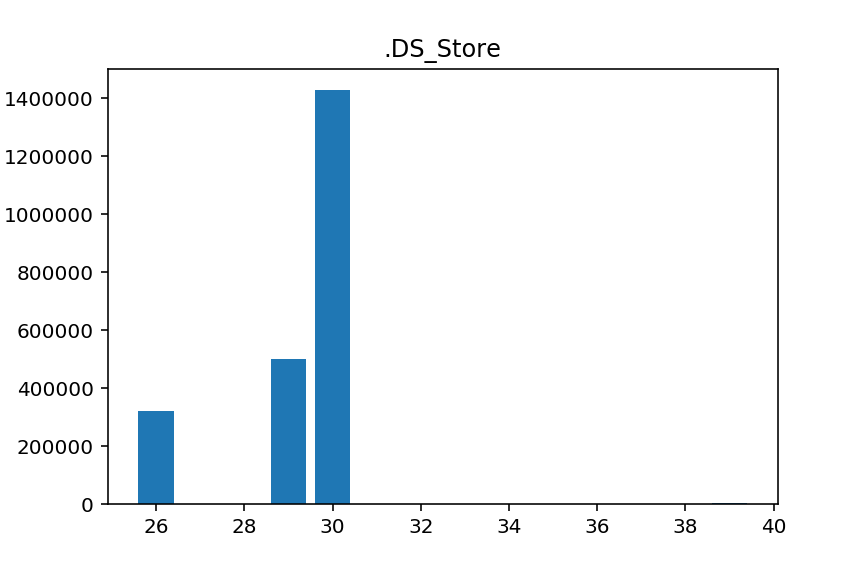

In [27]:
plt.figure()
plt.bar(dist2.keys(), dist2.values())
plt.title(dir_name)
plt.show()

,timestamp,milliseconds,acc_x,acc_y,acc_z
0,1449601597,1.449602e+12,0.006866,-0.000641,-0.997757
1,1449601597,1.449602e+12,0.004181,0.001450,-0.995285
2,1449601597,1.449602e+12,0.008514,-0.000671,-0.994827
3,1449601597,1.449602e+12,0.006805,0.000137,-0.996704
4,1449601597,1.449602e+12,0.004044,-0.000549,-0.998108
5,1449601597,1.449602e+12,0.005722,-0.000549,-0.995087
6,1449601597,1.449602e+12,0.006409,-0.000153,-0.997330
7,1449601597,1.449602e+12,0.004639,0.001526,-0.996414
8,1449601597,1.449602e+12,0.008942,-0.000641,-0.996307
9,1449601597,1.449602e+12,0.007492,0.002640,-0.994751
